In [103]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
data=pd.read_csv("data_clean.csv")
print(data)

     Unnamed: 0  Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
0             1   41.0    190.0   7.4     67     5    1  2010    67       S
1             2   36.0    118.0   8.0     72     5    2  2010    72       C
2             3   12.0    149.0  12.6     74     5    3  2010    74      PS
3             4   18.0    313.0  11.5     62     5    4  2010    62       S
4             5    NaN      NaN  14.3     56     5    5  2010    56       S
..          ...    ...      ...   ...    ...   ...  ...   ...   ...     ...
153         154   41.0    190.0   7.4     67     5    1  2010    67       C
154         155   30.0    193.0   6.9     70     9   26  2010    70      PS
155         156    NaN    145.0  13.2     77     9   27  2010    77       S
156         157   14.0    191.0  14.3     75     9   28  2010    75       S
157         158   18.0    131.0   8.0     76     9   29  2010    76       C

[158 rows x 10 columns]


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [109]:
# Dataframe attributes
print(type(data))
print(data.shape)
print(data.size)

<class 'pandas.core.frame.DataFrame'>
(158, 10)
1580


In [111]:
#drop supplicate column(temp c) amd unnamed column
data1 = data.drop(['Unnamed: 0',"Temp C"], axis = 1)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [113]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    158 non-null    object 
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 10.0+ KB


In [115]:
data1['Month']=pd.to_numeric(data['Month'],errors='coerce')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    157 non-null    float64
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.0+ KB


In [117]:
# print all duplicated rows
data1[data1.duplicated(keep=False)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
150,14.0,191.0,14.3,9.0,28,2010,75,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [119]:
#drop duplicated rows
data1.drop_duplicates(keep='first', inplace=True)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [121]:
data1.rename({'Solar.R': 'Solar'}, axis=1, inplace=True)
data1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


#impute the missing values

In [124]:
#display data1 missing values count in each in each column using is null(). sum()
data1.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

<Axes: >

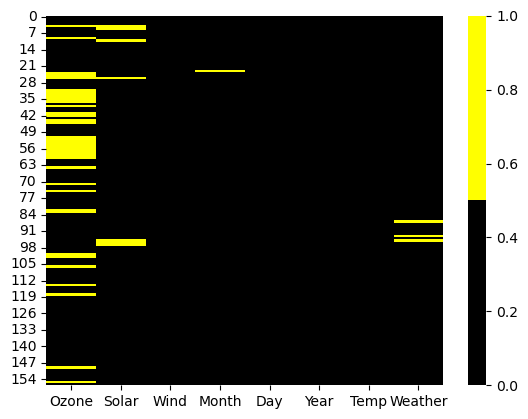

In [126]:
# visiualization data1 missing value using heat map
cols=data1.columns
colors=['black', 'yellow']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colors),cbar=True)

In [128]:
#find the mean and median values of each numeric
#Imputation of missing values with median
median_ozone=data1["Ozone"].median()
mean_ozone=data1["Ozone"].mean()
print("Median of Ozone: ", median_ozone)
print("Mean of Ozone: ",mean_ozone)

Median of Ozone:  31.0
Mean of Ozone:  41.81512605042017


In [130]:
#Replace the ozone missing values with median value
data1['Ozone']=data1['Ozone'].fillna(median_ozone)
data1.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [132]:
median_solar=data1["Solar"].median()
mean_solar=data1["Solar"].mean()
print("Median of Solar: ", median_solar)
print("Mean of Solar: ",mean_solar)

Median of Solar:  199.0
Mean of Solar:  185.36666666666667


In [134]:
data1['Solar']=data1['Solar'].fillna(mean_solar)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [136]:
#find the mode values of categorical column(Weather)
print(data1["Weather"].value_counts())
mode_weather=data1["Weather"].mode()[0]
print(mode_weather)

Weather
S     58
C     49
PS    47
Name: count, dtype: int64
S


In [138]:
#Impute missing values (replace nan with mode etc) of "weather using fillna()
data1["Weather"]=data1["Weather"].fillna(mode_weather)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [140]:
print(data1["Month"].value_counts())
mode_month=data1["Month"].mode()[0]
print(mode_month)

Month
9.0    33
5.0    31
7.0    31
8.0    31
6.0    30
Name: count, dtype: int64
9.0


In [142]:
data1["Month"]=data1["Month"].fillna(mode_month)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [144]:
#outlayer=extream value of a data set

# detection of outliers in the columns

In [147]:
#method1: using histogramns and box plots

<function matplotlib.pyplot.show(close=None, block=None)>

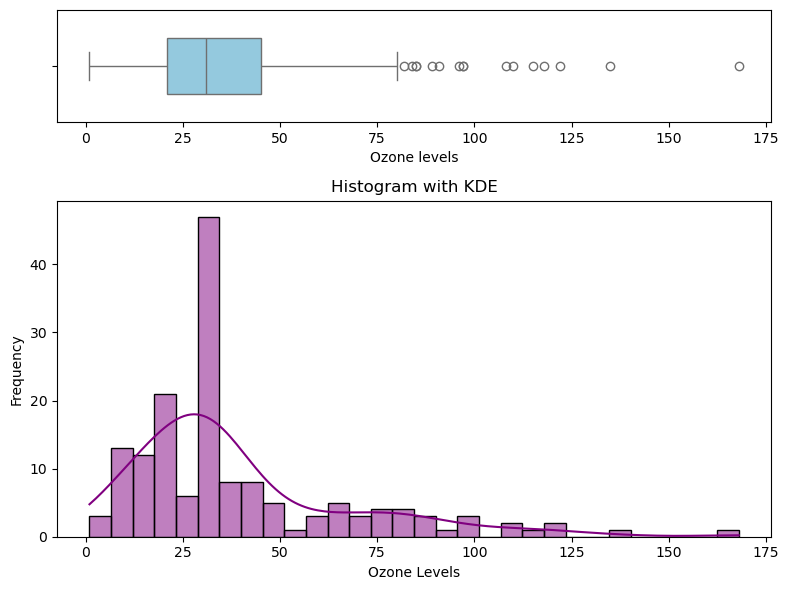

In [149]:
#crea, orientte a figure with two subplots ,stacked vertically
fig,axes=plt.subplots(2,1,figsize=(8, 6),gridspec_kw={'height_ratios':[1, 3]})

#plot the boxplot in the first (top) subplot
sns.boxplot(data=data1["Ozone"], ax=axes[0], color='skyblue', width=0.5, orient='h')
axes[0].set_xlabel("Ozone levels")

#plot the histogram with kde curve in the second (bottom) subplot
sns.histplot(data1["Ozone"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")

# adjest layout for better spacing
plt.tight_layout()

#show the plot
plt.show


In [150]:
#outliers of boxplot is above 80
#outliers of histogram is above 80

# Observations

# . the ozone column has extreme values beyond 81 as seen from box plot

In [155]:
# . the same is confirmed from the below right -skewed histogram

<function matplotlib.pyplot.show(close=None, block=None)>

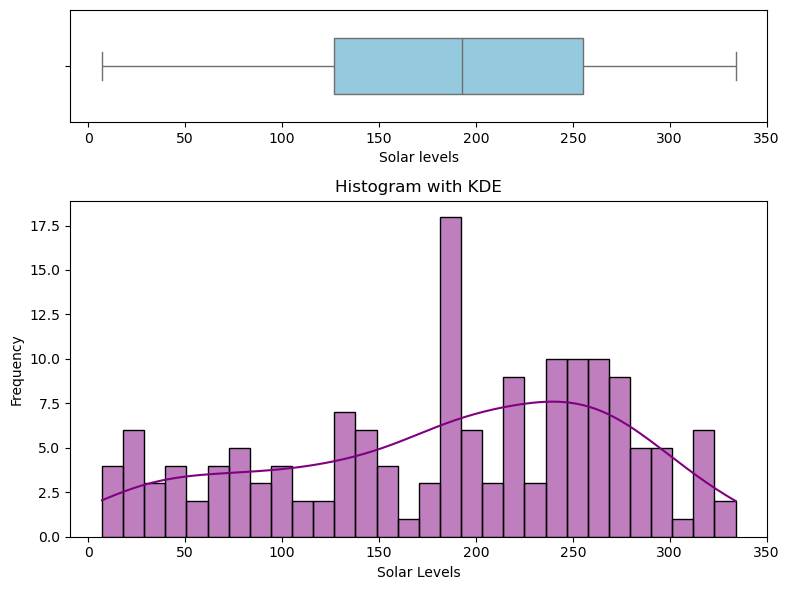

In [157]:
#crea, orientte a figure with two subplots ,stacked vertically
fig,axes=plt.subplots(2,1,figsize=(8, 6),gridspec_kw={'height_ratios':[1, 3]})

#plot the boxplot in the first (top) subplot
sns.boxplot(data=data1["Solar"], ax=axes[0], color='skyblue', width=0.5, orient='h')
axes[0].set_xlabel("Solar levels")

#plot the histogram with kde curve in the second (bottom) subplot
sns.histplot(data1["Solar"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Solar Levels")
axes[1].set_ylabel("Frequency")

# adjest layout for better spacing
plt.tight_layout()

#show the plot
plt.show


In [158]:
# in solar no outlaiers 
# no extrem values were observed from the bloxplot
# no extrem values were observed from the histogram


{'whiskers': [<matplotlib.lines.Line2D at 0x1dee12bfe90>,
 'caps': [<matplotlib.lines.Line2D at 0x1dee1264fe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dee16f3aa0>],
 'medians': [<matplotlib.lines.Line2D at 0x1dee1264110>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dee1264050>],
 'means': []}

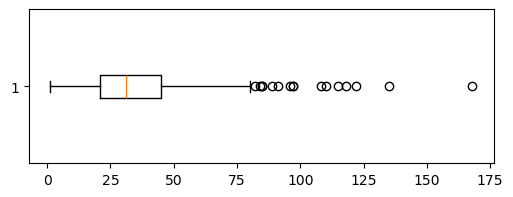

In [161]:
plt.figure(figsize=(6,2))
plt.boxplot(data1["Ozone"], vert=False)

[array([115., 135.,  97.,  97.,  85., 108.,  82., 122.,  89., 110., 168.,
        118.,  84.,  85.,  96.,  91.])]

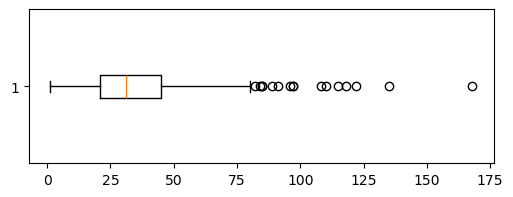

In [163]:
# extract outliners from boxplot for ozone column
plt.figure(figsize=(6,2))
boxplot_data=plt.boxplot(data1["Ozone"], vert=False)
[item.get_xdata() for item in boxplot_data['fliers']]

# method 2

# . using mu  +/-3*sigma limits(standard deviation method

In [167]:
data1["Ozone"].describe()

count    157.000000
mean      39.197452
std       28.781992
min        1.000000
25%       21.000000
50%       31.000000
75%       45.000000
max      168.000000
Name: Ozone, dtype: float64

In [169]:
mu=data1["Ozone"].describe()[1]
sigma=data1["Ozone"].describe()[2]

for x in data1["Ozone"]:
    if((x < (mu-3*sigma)) or (x > (mu + 3*sigma))):
        print(x)

135.0
168.0


C:\Users\chean\AppData\Local\Temp\ipykernel_24880\2966672946.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu=data1["Ozone"].describe()[1]
C:\Users\chean\AppData\Local\Temp\ipykernel_24880\2966672946.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma=data1["Ozone"].describe()[2]


# observation
#it is observed that only two outliners are idenfied using std method

#in box plot method more no of outliners are defined

#this is because the assumption of normality is not satisfied in this column

Quantile-Quantile plot for detection of outliers

Text(0.5, 0, 'Theoretical Quaantiles')

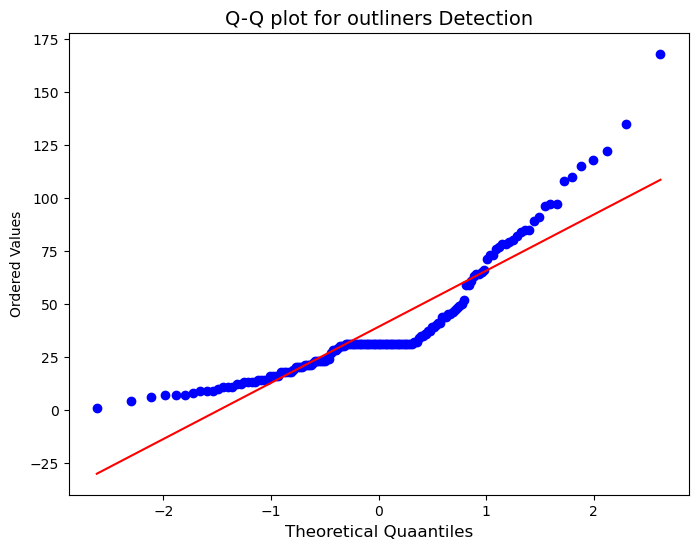

In [173]:
import scipy.stats as stats
#create q-q plot
plt.figure(figsize=(8, 6))
stats.probplot(data1["Ozone"], dist="norm", plot=plt)
plt.title("Q-Q plot for outliners Detection", fontsize=14)
plt.xlabel("Theoretical Quaantiles", fontsize=12)

#observation from Q-Q plot

. the data does not follow normal  distribution as the data points are deviating significantly away from the red line

. the data shows a right-skewed distribution and possible outliers

. other visualisations that could help in the detection of outliers

In [179]:
# create a figure for violin plot

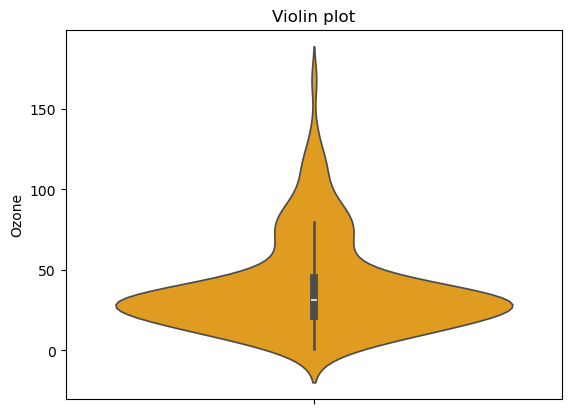

In [181]:
sns.violinplot(data=data1["Ozone"],color='orange')
plt.title("Violin plot")
plt.show()

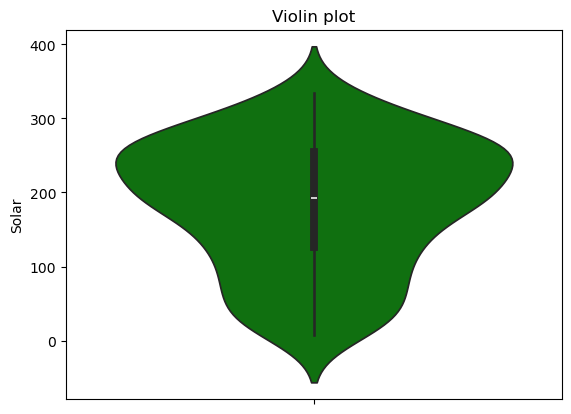

In [183]:
sns.violinplot(data=data1["Solar"],color='green')
plt.title("Violin plot")
plt.show()

<Axes: xlabel='Weather', ylabel='Ozone'>

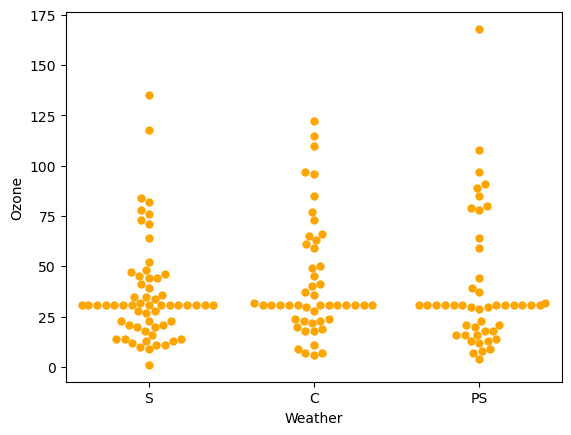

In [185]:
sns.swarmplot(data=data1, x="Weather", y="Ozone",color="orange",size=6)

<Axes: xlabel='Weather', ylabel='Ozone'>

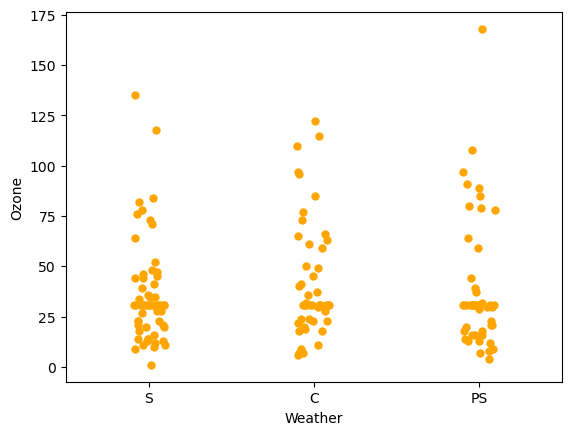

In [186]:
sns.stripplot(data=data1, x="Weather", y="Ozone",color="orange",size=6, jitter=True)

<Axes: xlabel='Ozone', ylabel='Density'>

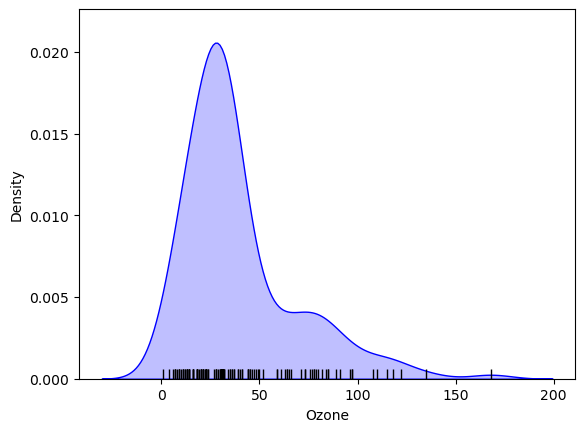

In [188]:
sns.kdeplot(data=data1["Ozone"], fill=True,color="blue")
sns.rugplot(data=data1["Ozone"], color="black")

<Axes: xlabel='Weather', ylabel='Ozone'>

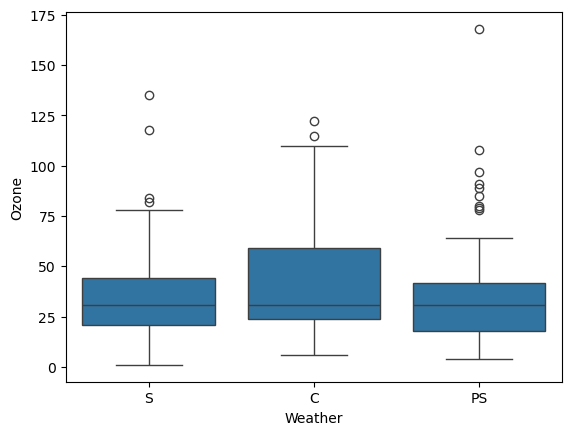

In [191]:
#category wise for ozone
sns.boxplot(data=data1, x="Weather", y="Ozone")

<Axes: ylabel='Ozone'>

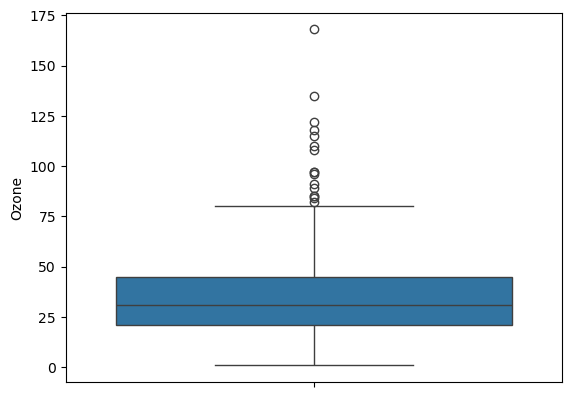

In [193]:
#category wise for ozone
sns.boxplot(data=data1,y="Ozone")

# Correlation coefficient and pair plots

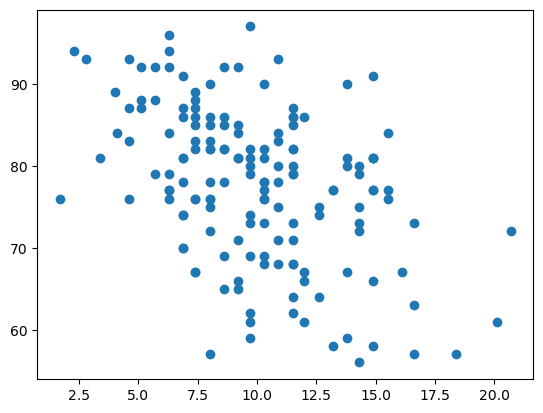

In [196]:
plt.scatter(data1["Wind"], data1["Temp"])

# compute pearson correlation coefficient

In [199]:
#between wind speed and temperature
data1["Wind"].corr(data1["Temp"])

-0.44122806925588215

In [201]:
#read al numeric columns into a new table
data1_numeric=data1.iloc[:,[0,1,2,6]]
data1_numeric

,Ozone,Solar,Wind,Temp
0,41.0,190.000000,7.4,67
1,36.0,118.000000,8.0,72
2,12.0,149.000000,12.6,74
3,18.0,313.000000,11.5,62
4,31.0,185.366667,14.3,56
...,...,...,...,...
152,20.0,223.000000,11.5,68
153,41.0,190.000000,7.4,67
154,30.0,193.000000,6.9,70
155,31.0,145.000000,13.2,77


In [208]:
#print correlation corelation for all the above columns
data1_numeric.corr()

,Ozone,Solar,Wind,Temp
Ozone,1.000000,0.297661,-0.523738,0.597087
Solar,0.297661,1.000000,-0.055874,0.260677
Wind,-0.523738,-0.055874,1.000000,-0.441228
Temp,0.597087,0.260677,-0.441228,1.000000


# observations

o the highest correlation strength isvobserved between ozine and temperature

o the next  highest correlation strength is observed between ozone and wind(-0.523738)

o the next  highest correlation strength is observed between ozone and temp(-0.441228)

o the least correlation strength is observed between solar and wind(-0.055874)

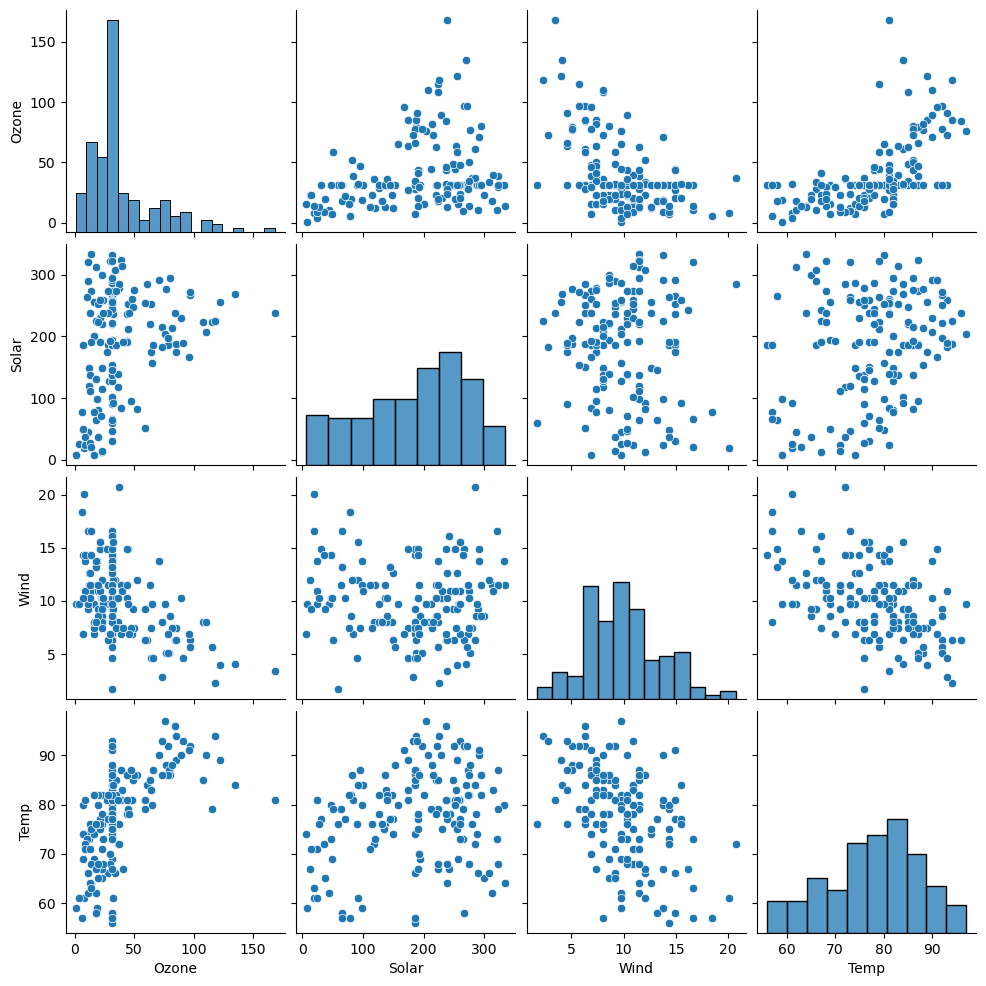

In [216]:
#plot a pair plot between all numeric columns using seaborn 
sns.pairplot(data1_numeric)

# transformations

In [236]:
# creating dummy  variable for weather column
data2=pd.get_dummies(data1,columns=['Month','Weather'])
data2

,Ozone,Solar,Wind,Day,Year,Temp,Month_5.0,Month_6.0,Month_7.0,Month_8.0,Month_9.0,Weather_C,Weather_PS,Weather_S
0,41.0,190.000000,7.4,1,2010,67,True,False,False,False,False,False,False,True
1,36.0,118.000000,8.0,2,2010,72,True,False,False,False,False,True,False,False
2,12.0,149.000000,12.6,3,2010,74,True,False,False,False,False,False,True,False
3,18.0,313.000000,11.5,4,2010,62,True,False,False,False,False,False,False,True
4,31.0,185.366667,14.3,5,2010,56,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,20.0,223.000000,11.5,30,2010,68,False,False,False,False,True,False,False,True
153,41.0,190.000000,7.4,1,2010,67,True,False,False,False,False,True,False,False
154,30.0,193.000000,6.9,26,2010,70,False,False,False,False,True,False,True,False
155,31.0,145.000000,13.2,27,2010,77,False,False,False,False,True,False,False,True


# normalization

In [244]:
data1_numeric.values

array([[ 41.        , 190.        ,   7.4       ,  67.        ],
       [ 36.        , 118.        ,   8.        ,  72.        ],
       [ 12.        , 149.        ,  12.6       ,  74.        ],
       [ 18.        , 313.        ,  11.5       ,  62.        ],
       [ 31.        , 185.36666667,  14.3       ,  56.        ],
       [ 28.        , 185.36666667,  14.9       ,  66.        ],
       [ 23.        , 299.        ,   8.6       ,  65.        ],
       [ 19.        ,  99.        ,  13.8       ,  59.        ],
       [  8.        ,  19.        ,  20.1       ,  61.        ],
       [ 31.        , 194.        ,   8.6       ,  69.        ],
       [  7.        , 185.36666667,   6.9       ,  74.        ],
       [ 16.        , 256.        ,   9.7       ,  69.        ],
       [ 11.        , 290.        ,   9.2       ,  66.        ],
       [ 14.        , 274.        ,  10.9       ,  68.        ],
       [ 18.        ,  65.        ,  13.2       ,  58.        ],
       [ 14.        , 334

In [ ]:
#normaliation of data 
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array=data1_numeric.values

scaler= MinMaxScaler(features_range=(0,1))
rescaledx=scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(rescaledx[0:10,:)
